<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Clustering</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;">We will project high dimensional data into 2 dimensions.</p>
</div>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as requests
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time

In [19]:
# Import and normalize cloud data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data'
contents = requests.urlopen(url).read()
contents = str(contents)
with open('clouddata.txt', 'w') as file:
    file.write(contents)

In [45]:
def removeAllDoubleSpaces(line):
    while '  ' in line:
        line = line.replace('  ', ' ')
    return line

def mapToFloats(line):
    floats = []
    for n in line.split():
        try:
            floats.append(float(n))
        except:
            return None
    return floats

lines = contents.split('\\n')
lines = [line.strip() for line in lines]
lines = [removeAllDoubleSpaces(line) for line in lines]
original = lines
lines = [mapToFloats(line) for line in lines]
lines = [line for line in lines if line is not None and len(line) > 0]
lines = np.array(lines)
original

["b'(Message inbox:11)",
 'Received: from charon.arc.nasa.gov by ICS.UCI.EDU id aa04470; 3 Aug 89 16:09 PDT',
 'Received: from HALEAKALA.arc.nasa.gov by CHARON.arc.nasa.gov via INTERNET with SMTP id 40193; 3 Aug 89 15:36:34 PDT',
 'Date: Thu, 3 Aug 89 15:36 PDT',
 'From: will taylor <taylor@CHARON.arc.nasa.GOV>',
 'Subject: Clouds Data Base',
 'To: aha@ICS.UCI.EDU',
 'Message-ID: <19890803223605.1.TAYLOR@HALEAKALA.arc.nasa.gov>',
 '',
 'David -',
 '',
 'Here are two cloud cover images and descriptive info.',
 'Source of data:',
 '',
 'Philippe Collard - California Space Institute',
 '\\t\\t A-021, UCSD',
 '\\t\\t La Jolla, CA 92093',
 '\\t\\t (619)534-6369',
 '\\t\\t 27799::collard (decnet)',
 '',
 ';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '',
 '; CLOUD DATABASE',
 ';The data sets we propose to analyse are constituted of 1024 vectors, each',
 ';vector includes 10 parameters. You can think of it as a 1024*10 matrix.',
 ';To produce these vectors, we proceed as f

In [46]:
lines

array([[  3.    , 140.    ,  43.5   , ..., 163.    , 240.    , 213.3555],
       [  3.    , 135.    ,  41.9063, ..., 167.    , 239.    , 213.7188],
       [  2.    , 126.    ,  21.0586, ..., 174.    , 240.    , 227.5859],
       ...,
       [  7.9397,  48.7863,  20.7169, ..., -79.7594,  30.7739, -11.1662],
       [  6.6498,  61.2553,  23.0195, ..., -71.842 ,  29.9047,   0.711 ],
       [  4.9299,  31.5877,  14.6402, ..., -52.3305,  34.0016,   4.5046]])

In [54]:
# normalize the data

shape = lines.shape # (rows, columns)
rows = shape[0]
columns = shape[1]

normalizedLines = np.zeros(shape)
for i in range(columns):
    col = lines[:,i]
    mean = np.mean(col)
    std = np.std(col,ddof=1)
    normalizedLines[:,i] = (col - mean) / std

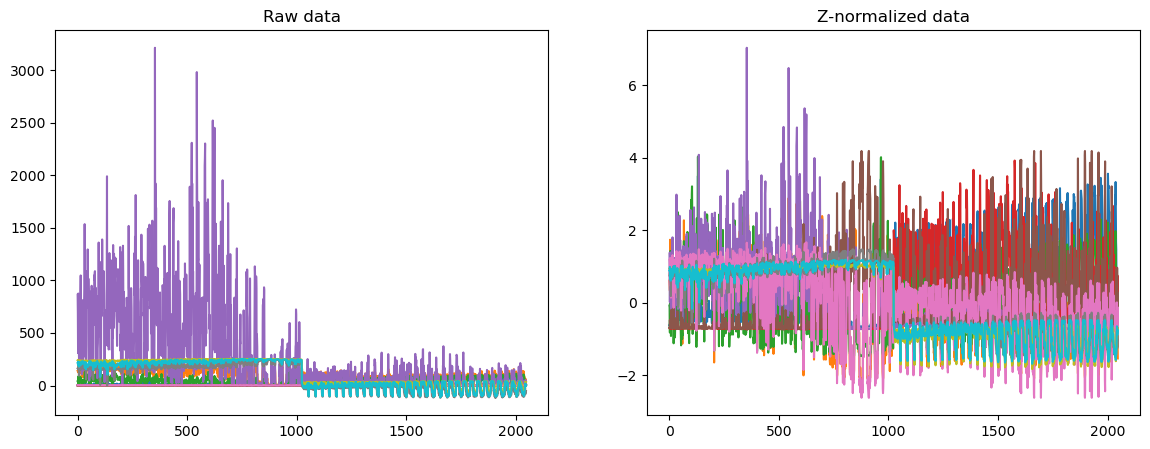

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(lines)
ax[0].set_title('Raw data')

ax[1].plot(normalizedLines)
ax[1].set_title('Z-normalized data')

plt.show()

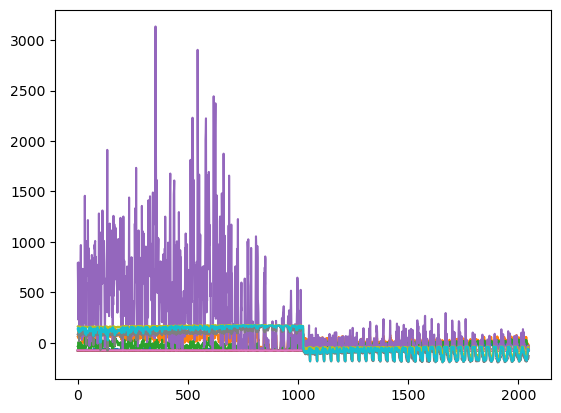

In [60]:
# Compute and inspect data covariance matrices
meanCenteredLines = lines - np.mean(lines)
plt.plot(meanCenteredLines);

In [67]:
# cov features for features
covFeatures = meanCenteredLines.T @ meanCenteredLines / (meanCenteredLines.shape[1] - 1)
covFeaturesZ = normalizedLines.T @ normalizedLines / (meanCenteredLines.shape[1] - 1)

# cov features for observations
covObservations = meanCenteredLines @ meanCenteredLines.T / (meanCenteredLines.shape[0] - 1)
covObservationsZ = normalizedLines @ normalizedLines.T / (meanCenteredLines.shape[0] - 1)


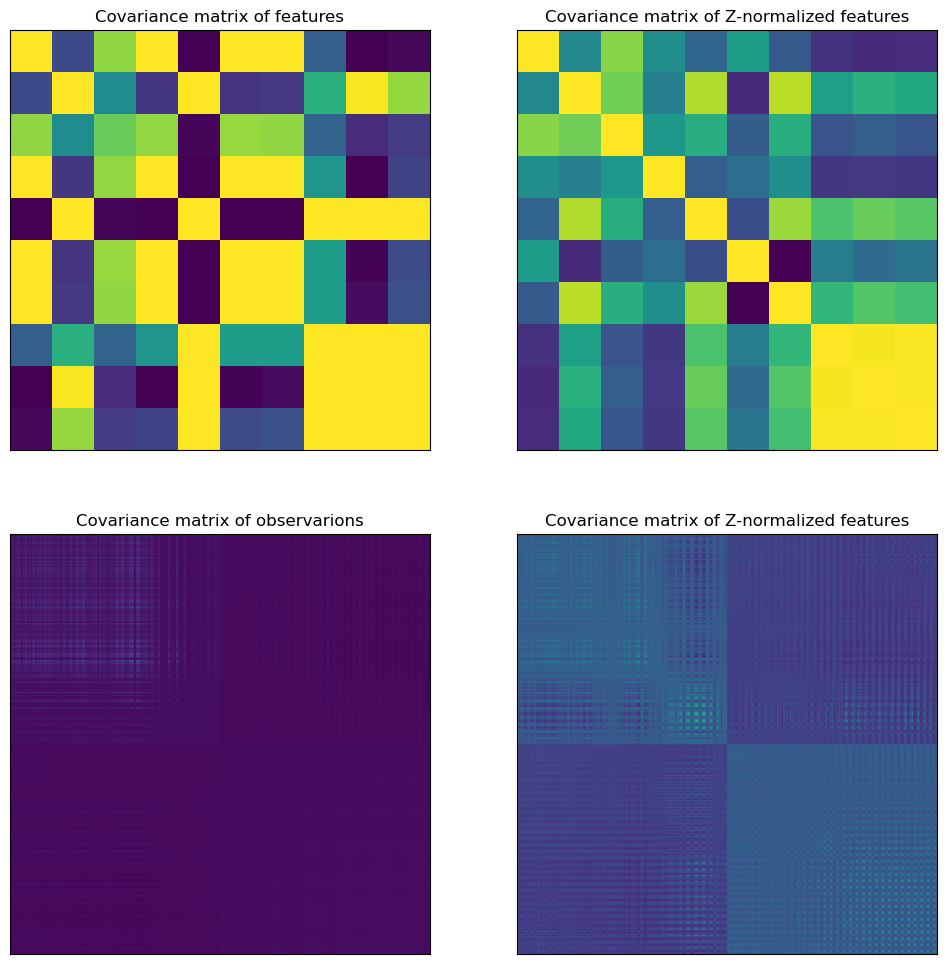

In [84]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

ax[0, 0].imshow(covFeatures, vmin=-8e5, vmax=8e5)
ax[0, 0].set_title('Covariance matrix of features')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].imshow(covFeaturesZ)
ax[0, 1].set_title('Covariance matrix of Z-normalized features')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[1, 0].imshow(covObservations)
ax[1, 0].set_title('Covariance matrix of observarions')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].imshow(covObservationsZ)
ax[1, 1].set_title('Covariance matrix of Z-normalized features')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

plt.show()

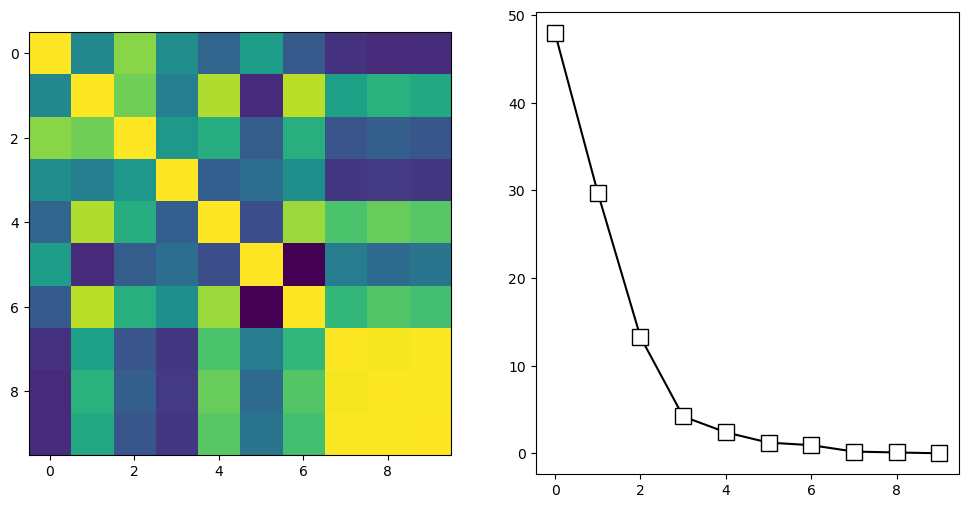

In [98]:
pca = PCA().fit(normalizedLines)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(pca.get_covariance())
ax[1].plot(100*pca.explained_variance_ratio_, 'ks-', markerfacecolor='white', markersize=12)
plt.show()

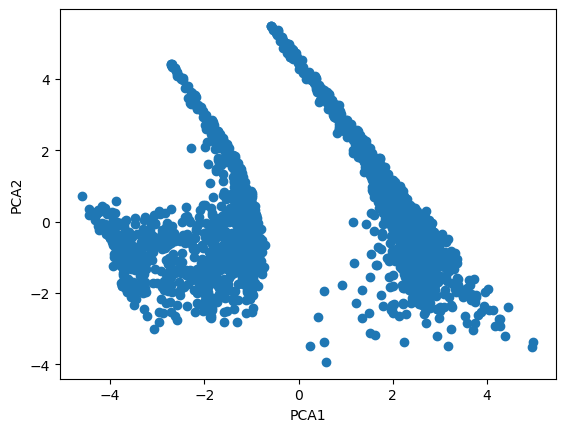

In [107]:
# Project the data to 2 PCs (principal components)
lines2D = pca.transform(normalizedLines)
plt.plot(lines2D[:,0], lines2D[:,1], 'o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


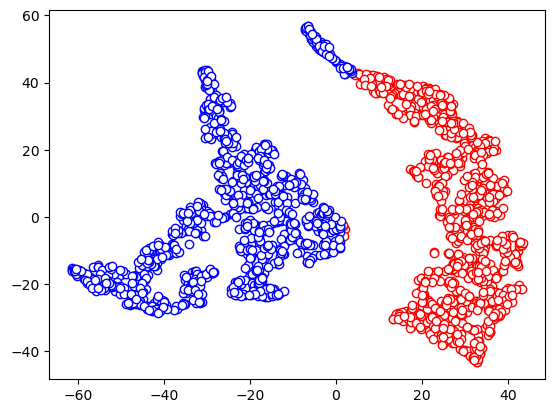

In [116]:
t = TSNE().fit_transform(normalizedLines)
clusters = KMeans(n_clusters=2).fit(t)

plt.plot(t[clusters.labels_==0,0], t[clusters.labels_==0,1], 'ro', markerfacecolor='w')
plt.plot(t[clusters.labels_==1,0], t[clusters.labels_==1,1], 'bo', markerfacecolor='w')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

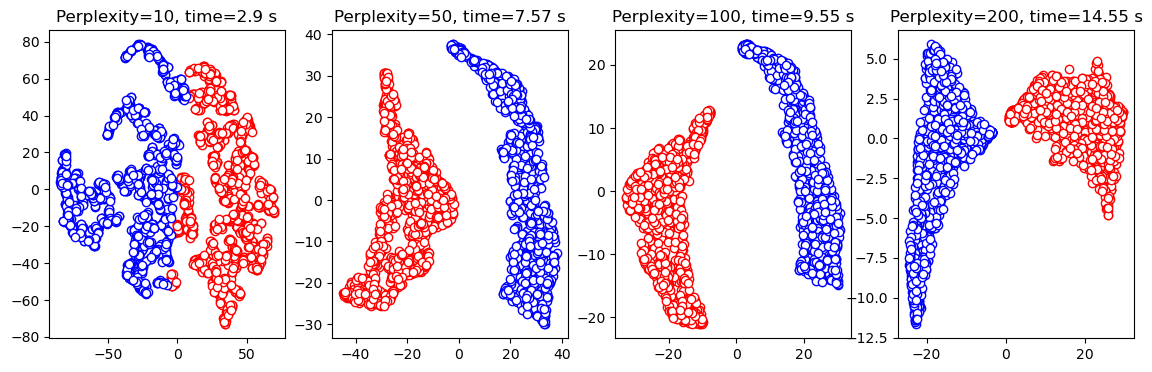

In [131]:
perps = [10, 50, 100, 200]

fig,ax = plt.subplots(1, 4, figsize=(14,4))
for i in range(len(perps)):
    perp = perps[i]
    starttime = time.time()
    t = TSNE(perplexity=perp).fit_transform(normalizedLines)
    clusters = KMeans(n_clusters=2).fit(t)
    endtime = time.time()
    
    duration = endtime - starttime

    ax[i].plot(t[clusters.labels_==0,0], t[clusters.labels_==0,1], 'ro', markerfacecolor='w')
    ax[i].plot(t[clusters.labels_==1,0], t[clusters.labels_==1,1], 'bo', markerfacecolor='w')
    ax[i].set_title(f'Perplexity={perp}, time={round(duration, 2)} s')

plt.show()